In [1]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy import stats
import statistics
import warnings

# file path - this for linux windows you will need "//"
f_path = "conn_attack.csv"

df = pd.read_csv(f_path,names=["record ID","duration", "src_bytes","dst_bytes"], header=None)

In [2]:
data = df.dropna()
data.head()

record ID  duration  src_bytes  dst_bytes
0          1         0        236       1228
1          2         0        239        486
2          3         0        234       1364
3          4         0        239       1295
4          5         0        181       5450

In [3]:
data.tail()

record ID  duration  src_bytes  dst_bytes
256665     256666         0        306        236
256666     256667         0        288       4017
256667     256668         0        289       1096
256668     256669         0        198       2169
256669     256670         0        212       2288

In [4]:
data.shape

(256670, 4)

In [5]:
df.describe()

record ID       duration      src_bytes     dst_bytes
count  256670.000000  256670.000000  256670.000000  2.566700e+05
mean   128335.500000       0.640936     474.247898  4.473533e+03
std     74094.391134      15.627170    3391.106084  2.080903e+04
min         1.000000       0.000000       0.000000  0.000000e+00
25%     64168.250000       0.000000     217.000000  6.600000e+02
50%    128335.500000       0.000000     249.000000  1.661000e+03
75%    192502.750000       0.000000     306.000000  4.341000e+03
max    256670.000000    3289.000000   54540.000000  7.068759e+06

In [6]:
data.columns

Index(['record ID', 'duration', 'src_bytes', 'dst_bytes'], dtype='object')

In [7]:
#Unique value count
data.nunique()

record ID    256670
duration        368
src_bytes       473
dst_bytes     17063
dtype: int64

In [8]:
data.isnull().sum()

record ID    0
duration     0
src_bytes    0
dst_bytes    0
dtype: int64

In [9]:
corelation_data = data.drop("record ID",axis=1)

In [10]:
corelation_data.head()

duration  src_bytes  dst_bytes
0         0        236       1228
1         0        239        486
2         0        234       1364
3         0        239       1295
4         0        181       5450

In [11]:
corelation = corelation_data.corr()

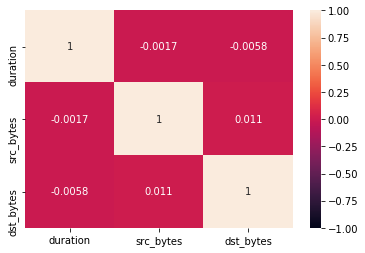

In [12]:
#Heat-map
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,vmin=-1,vmax=1,annot=True)

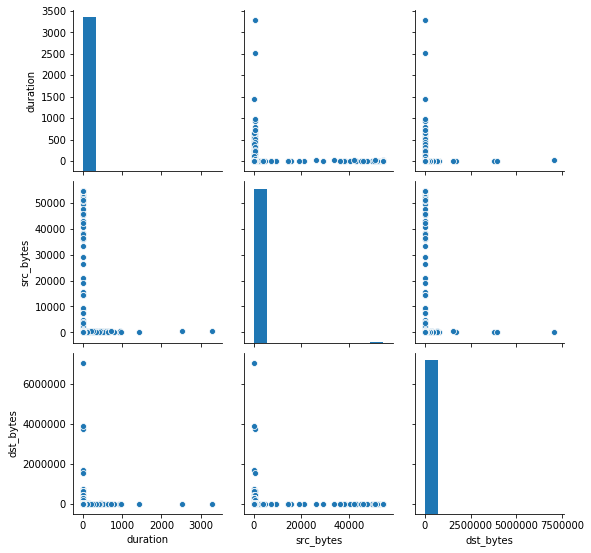

In [13]:
#
sns.pairplot(corelation_data)

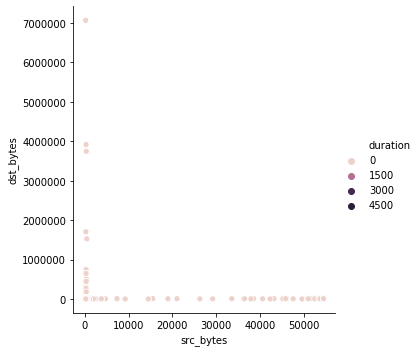

In [14]:
sns.relplot(x='src_bytes',y='dst_bytes',hue='duration',data=corelation_data)#, legend="full")

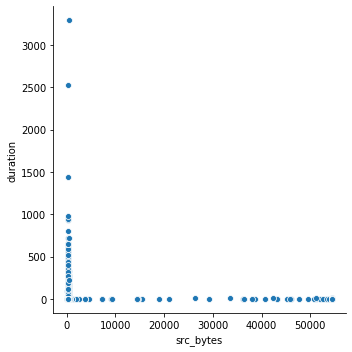

In [15]:
sns.relplot(x='src_bytes',y='duration',data=corelation_data)

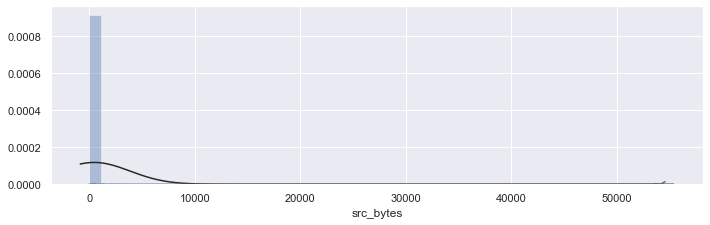

In [153]:
# sns.set(rc={'figure.figsize':(11.7,3.27)})
sns.distplot(df['src_bytes'], fit=norm )


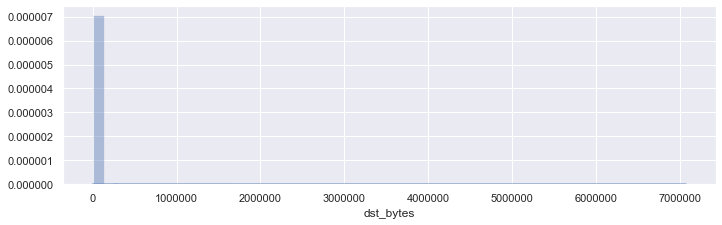

In [151]:
sns.distplot(df['dst_bytes'] )

In [18]:
#sns.distplot(df['duration'])

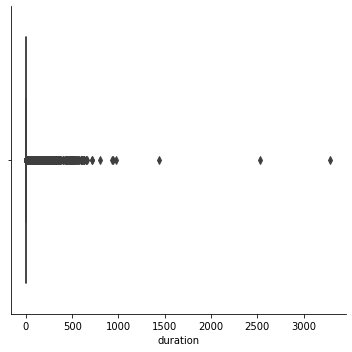

In [19]:
sns.catplot(x='duration',kind='box',data=df)

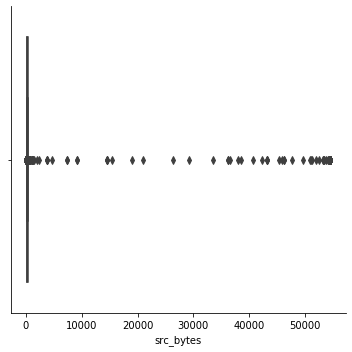

In [20]:
sns.catplot(x='src_bytes',kind='box',data=df)

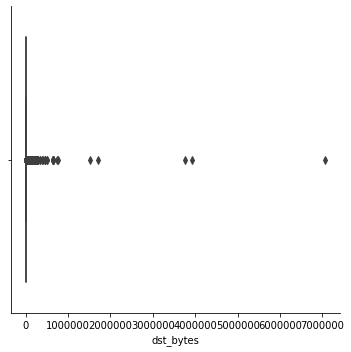

In [21]:
sns.catplot(x='dst_bytes',kind='box',data=df)

In [22]:
#Variance
df.var()
corelation_data.var()

duration     2.442084e+02
src_bytes    1.149960e+07
dst_bytes    4.330159e+08
dtype: float64

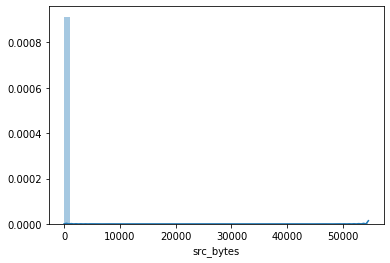

In [23]:
#histogram
sns.distplot(df['src_bytes']);

# fig, ax = plt.subplots()
# sns.distplot(df['src_bytes'], ax=ax)
# ax.set_xlim(1,1000)
# ax.set_xticks(range(1,10))
# plt.show()


In [30]:
#Our algorithm#'

f_path = "conn_attack.csv"

df = pd.read_csv(f_path,names=["record ID","duration", "src_bytes","dst_bytes"], header=None)

df.dropna()

ratio = []

#duration mean + standard deviation
dt_mean = df["duration"].mean()
dt_std = df["duration"].std()

#src_bytes mean + standard deviation
src_mean = df["src_bytes"].mean()
src_std = df["src_bytes"].std()

#dst_bytes mean + standard deviation
dst_mean = df["dst_bytes"].mean()
dst_std = df["dst_bytes"].std()

import math

sum_ratio = 0.0
lengthCSV = len(df)

print(df.iloc[0, 0])
print(df.iloc[0, 1])
print(df.iloc[0, 2])
print(df.iloc[0, 3])


for i in range(lengthCSV) :
    
    if df.iloc[i, 3] != 0 :
#       if(math.isnan(df.iloc[i, 2]/df.iloc[i, 3])):
#             print("src: ",df.iloc[i, 2]/df.iloc[i, 3])
      ratio.append(df.iloc[i, 2]/df.iloc[i, 3])
      sum_ratio += (df.iloc[i, 2]/df.iloc[i, 3])
    else: 
        ratio.append(0)
   

1
0
236
1228


In [31]:
print(sum_ratio)
print(ratio)

82167.88958015447
[0.19218241042345277, 0.49176954732510286, 0.17155425219941348, 0.18455598455598454, 0.033211009174311926, 0.020509977827051, 0.18455598455598454, 0.11466535433070867, 0.033211009174311926, 0.11466535433070867, 0.17155425219941348, 0.0357773851590106, 0.03224381625441696, 0.030275229357798167, 0.1722007722007722, 0.1791530944625407, 0.10679133858267717, 0.1637995512341062, 0.4588477366255144, 0.018736141906873616, 0.1598240469208211, 0.030275229357798167, 0.1722007722007722, 0.018736141906873616, 0.030275229357798167, 0.1722007722007722, 0.10679133858267717, 0.4588477366255144, 0.00441476617268613, 0.03224381625441696, 0.290491118077325, 0.10927835051546392, 0.013481946205699794, 0.09082774049217002, 0.1266213712168005, 0.03890384144849523, 0.010804435008256664, 0.053999096249435156, 0.1478711162255466, 0.020750631540959942, 0.027265248560347868, 1.390728476821192, 0.024400639318060736, 0.3349282296650718, 0.281413612565445, 0.027265745007680493, 0.022289660946002512,

In [123]:
# Print mean standard deviation
print("Standard Deviation of duration is: " + str(dt_std))
print("duration mean : " + str(dt_mean))

# Print mea standard deviation
print("Standard Deviation of src_bytes is: " + str(src_std))
print("src_bytes mean : " + str(src_mean))

# Print mean standard deviation
print("Standard Deviation of dst_bytes is: " + str(dst_std))
print("dst_bytes mean : " + str(dst_mean))



ratio_std = statistics.pstdev(ratio)
ratio_mean = sum_ratio/lengthCSV

print("Standard Deviation of ratio is :"+str(ratio_std))
print("ratio mean : " + str(ratio_mean))

anomaly = []
normal = []
for i in range(lengthCSV) :
      if(df.iloc[i, 1]>dt_mean+dt_std or df.iloc[i, 2]>src_mean+src_std or df.iloc[i, 3]>dst_mean+dst_std or ratio[i]>ratio_mean+ratio_std ):
                anomaly.append(df.iloc[i,0])
      else :
        normal.append(df.iloc[i,0])
#print(anomaly)
print("anomaly list is :" + str(len(anomaly)))
print("normal list is :" + str(len(normal)))

Standard Deviation of duration is: 1.2743703150353645
duration mean : 0.0
Standard Deviation of src_bytes is: 426.2111413793658
src_bytes mean : 249.0
Standard Deviation of dst_bytes is: 4636.105607524605
dst_bytes mean : 1661.0
Standard Deviation of ratio is :0.9178279817228151
ratio mean : 0.3201304771892098
anomaly list is :53914
normal list is :202756


In [124]:
from scipy.stats import median_absolute_deviation

# #Our algorithm - median#

f_path = "conn_attack.csv"

df = pd.read_csv(f_path,names=["record ID","duration", "src_bytes","dst_bytes"], header=None)

df.dropna()

#duration mean + standard deviation
dt_median = df["duration"].median()
dt_std_median = df["duration"].mad()


#src_bytes mean + standard deviation
src_median = df["src_bytes"].median()
src_std_median = df["src_bytes"].mad()

#dst_bytes mean + standard deviation
dst_median = df["dst_bytes"].median()
dst_std_median = df["dst_bytes"].mad()



# sum_ratio = 0.0
# lengthCSV = len(df)
# for i in range(lengthCSV) :
#     if df.iloc[i, 3] != 0 :
#       ratio.append(df.iloc[i, 2]/df.iloc[i, 3])
#       sum_ratio += (df.iloc[i, 2]/df.iloc[i, 3])
#     else: 
#         ratio.append(0)
   

# Print mean standard deviation
print("Standard Deviation of duration is: " + str(dt_std_median))
print("duration mean : " + str(dt_median))

# Print mea standard deviation
print("Standard Deviation of src_bytes is: " + str(src_std_median))
print("src_bytes mean : " + str(src_median))

# Print mean standard deviation
print("Standard Deviation of dst_bytes is: " + str(dst_std_median))
print("dst_bytes mean : " + str(dst_median))


temp = pd.DataFrame()
temp['ratio'] = ratio
temp2 = temp['ratio'].mad()


# ratio_std = statistics.pstdev(ratio)
# ratio_mean = sum_ratio/lengthCSV
ratio_median = statistics.median(ratio)
ratio_median_std = temp2  #stats.median_abs_deviation(ratio)


print("Standard Deviation of ratio is :"+str(ratio_std))
print("ratio mean : " + str(ratio_mean))

print("median  : " + str(ratio_median))
print("ratio_median_std : " + str(ratio_median_std))

normal = []
anomaly1 = []

# print(df.iloc[140816, 2])
# print(df.iloc[140816, 2]>src_std)

for i in range(lengthCSV) :
      if(df.iloc[i, 1]>dt_median+dt_std_median or df.iloc[i, 2]>src_median+src_std_median or df.iloc[i, 3]>dst_median+dst_std_median or ratio[i]>ratio_median+ratio_median_std ):
     #       if(df.iloc[i, 1]>dt_std or df.iloc[i, 2]>src_std or df.iloc[i, 3]>dst_std or ratio[i]>ratio_std ):
            anomaly1.append(df.iloc[i,0])
      else :
            normal.append(df.iloc[i,0])
#print(anomaly)
print("anomaly list is :" + str(len(anomaly1)))
print("normal list is :" + str(len(normal)))

Standard Deviation of duration is: 1.2743703150353645
duration mean : 0.0
Standard Deviation of src_bytes is: 426.2111413793658
src_bytes mean : 249.0
Standard Deviation of dst_bytes is: 4636.105607524605
dst_bytes mean : 1661.0
Standard Deviation of ratio is :0.9178279817228151
ratio mean : 0.3201304771892098
median  : 0.15631131458469588
ratio_median_std : 0.2914872411708527
anomaly list is :105435
normal list is :151235


In [125]:
print(140816 in anomaly1)

True


In [126]:

# file path - this for linux windows you will need "//"
f_path = "task-1-full-with-labels.csv"

df2 = pd.read_csv(f_path,names=["record ID","duration", "src_bytes","dst_bytes",'label'], header=None)


df2.describe()

duration      src_bytes     dst_bytes          label
count  256131.000000  256131.000000  2.561310e+05  256670.000000
mean        0.104415     474.637346  4.481594e+03       0.003982
std         2.516899    3394.661002  2.082998e+04       0.062976
min         0.000000       0.000000  0.000000e+00       0.000000
25%         0.000000     217.000000  6.630000e+02       0.000000
50%         0.000000     249.000000  1.668000e+03       0.000000
75%         0.000000     306.000000  4.359000e+03       0.000000
max       276.000000   54540.000000  7.068759e+06       1.000000

In [127]:
print(anomaly1)

[2, 6, 19, 20, 24, 28, 29, 33, 37, 40, 41, 42, 43, 46, 47, 51, 56, 60, 63, 66, 67, 69, 70, 73, 75, 76, 78, 83, 84, 85, 88, 89, 91, 94, 96, 98, 100, 101, 102, 104, 106, 109, 111, 112, 113, 118, 128, 129, 131, 133, 134, 135, 139, 140, 142, 144, 145, 150, 151, 152, 154, 155, 156, 157, 159, 160, 161, 163, 164, 165, 167, 168, 169, 172, 173, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 194, 195, 197, 198, 199, 201, 204, 205, 206, 207, 208, 209, 210, 211, 212, 215, 216, 217, 218, 221, 222, 223, 226, 227, 240, 246, 248, 249, 254, 260, 269, 275, 278, 282, 289, 297, 300, 304, 311, 313, 318, 324, 325, 327, 328, 333, 338, 340, 343, 344, 348, 356, 361, 375, 381, 391, 397, 399, 411, 413, 414, 420, 421, 430, 432, 434, 435, 438, 441, 444, 445, 449, 450, 455, 457, 459, 460, 461, 462, 468, 471, 472, 473, 474, 477, 488, 499, 509, 520, 524, 526, 529, 530, 531, 532, 534, 535, 536, 538, 539, 540, 541, 542, 544, 545, 546, 547, 550, 551, 552, 553, 554, 555, 557, 558, 559, 560, 561, 562, 563, 56

In [128]:
sum_label = 0
answer = []
for i in range(len(df2)):
    if df2.iloc[i,4]==1:
        sum_label+=1
        answer.append(int(df2.iloc[i,0]))
        
#     test_list[i] = int(test_list[i])
        
        

In [129]:
print(sum_label)
print(answer)

1022
[91184, 140816, 140817, 140818, 140819, 140820, 140821, 140822, 140823, 140824, 140825, 140826, 140827, 140828, 140829, 140830, 140831, 140832, 140833, 140834, 140835, 140836, 140837, 140838, 140839, 140840, 140841, 140842, 140843, 140844, 140845, 140846, 140847, 140848, 140849, 140850, 140851, 140852, 140853, 140854, 140855, 140856, 140857, 140858, 140859, 140860, 140861, 140862, 140863, 140864, 140865, 140866, 140867, 140868, 140869, 140870, 140871, 140872, 140873, 140874, 140875, 140876, 140877, 140878, 140879, 140880, 140881, 140882, 140883, 140884, 140885, 140886, 140887, 140888, 140889, 140890, 140891, 140892, 140893, 140894, 140895, 140896, 140897, 140898, 140899, 140900, 140901, 140902, 140903, 140904, 140905, 140906, 140907, 140908, 140909, 140910, 140911, 140912, 140913, 140914, 140915, 140916, 140917, 140918, 140919, 140920, 140921, 140922, 140923, 140924, 140925, 140926, 140927, 140928, 140929, 140930, 140931, 140932, 140933, 140934, 140935, 140936, 140937, 140938, 140

In [130]:
#both mean and median didnt work

sum_correct=0
sum_correct1=0
for i in range(len(anomaly)):
    if anomaly[i] in answer:
        sum_correct+=1
    if anomaly1[i] in answer:
        sum_correct1+=1
        
    

In [143]:
print(sum_correct)
print(sum_correct1)
print(141026 in anomaly)
print(91183 in anomaly)


1012
1
True
True


In [132]:
#print(anomaly1)

#print("end")
#print(answer)

In [133]:
#duplicate algorithm

# old = []
# dup = []

# temp =[]
# for i in range(len(data)):
#     temp.append(data.iloc[i,1])
#     temp.append(data.iloc[i,2])
#     temp.append(data.iloc[i,3])
    
#     if(temp not in old):
#         old.append(temp)
#     else:   
#         dup.append(temp)
#     temp = []   
# print(len(dup))
# print(len(old))    
dup = corelation_data[corelation_data.duplicated()]

In [134]:
print(len(dup))

121275


In [135]:
dup.head()

duration  src_bytes  dst_bytes
6          0        239       1295
8          0        181       5450
9          0        233       2032
10         0        234       1364
21         0        165       5450

In [141]:
#Kmeans



# Importing Modules
from sklearn.cluster import KMeans


f_path = "conn_attack.csv"

df = pd.read_csv(f_path,names=["record ID","duration", "src_bytes","dst_bytes"], header=None)

df.pop("record ID")


df.dropna()

# Loading dataset
# iris_df = datasets.load_iris()

# Declaring Model
model = KMeans(n_clusters=2)

# Fitting Model
model.fit(df)

# Predicitng a single input
predicted_label = model.predict([[0, 311, 447]])

# Prediction on the entire data
all_predictions = model.predict(df)

# Printing Predictions
print(predicted_label)
print(all_predictions)

[0]
[0 0 0 ... 0 0 0]


In [160]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
    
clf = DecisionTreeClassifier(random_state=0)
iris = df
#problem here it needs target... so maybe a different algorithm
cross_val_score(clf, iris, iris, cv=10)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').